# - Import data into Python environment.




In [209]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Libin\Desktop\Comcast_telecom_complaints_data.csv")
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [210]:
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [211]:
df=df.rename(columns={'Ticket #':'Ticket Number'})

In [212]:
df.head()

,Ticket Number,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [213]:
df['Date']=df['Date'].astype('datetime64[ns]')

In [214]:
df.dtypes

Ticket Number                          object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                        object
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [215]:
wanted_columns=df[['Ticket Number','Date','Received Via','State','Status']]


# Provide the trend chart for the number of complaints at monthly and daily granularity levels.

Provide a table with the frequency of complaint types.


In [217]:
wanted_columns.head()
import matplotlib.pyplot as plt
%matplotlib inline
df1 =wanted_columns.groupby(wanted_columns['Date']).size().reset_index(name='Count')
df1=df1.set_index('Date')

In [218]:
df1['Year'] = df1.index.year
df1['Month'] = df1.index.month
df1['Weekday Name'] = df1.index.weekday_name
df1['day']=df1.index.day

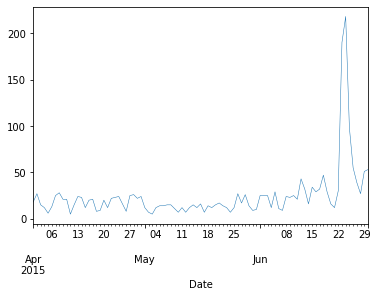

In [219]:
df1['Count'].plot(linewidth=0.5);


In [220]:
dif_mnth=df1.groupby(df1['Month']).size().reset_index(name='Count')

#- Which complaint types are maximum i.e., around internet, network issues, or across any other domains.


([<matplotlib.patches.Wedge at 0x1d2f36f6f48>,
 [Text(0.56092583464912, 0.9462358099454851, 'April'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'May'),
  Text(0.5609260118350907, -0.9462357049101349, 'June')],
 [Text(0.3059595461722473, 0.5161286236066281, '33.0%'),
  Text(-0.5999999999999974, -5.6176054134900006e-08, '34.1%'),
  Text(0.3059596428191404, -0.5161285663146189, '33.0%')])

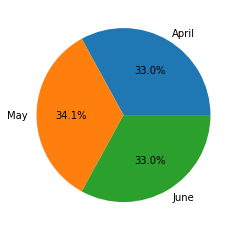

In [222]:
Labels=['April','May','June']
size=dif_mnth['Count']
plt.pie(size,labels=Labels,autopct='%1.1f%%')

In [223]:

#- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

wanted_columns['Cstatus'] = ['Open' if x =='Pending' or x=='Open' else 'Closed' for x in wanted_columns['Status']] 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [224]:
wanted_columns.tail()

,Ticket Number,Date,Received Via,State,Status,Cstatus
2219,213550,2015-04-02,Customer Care Call,Florida,Closed,Closed
2220,318775,2015-06-02,Customer Care Call,Michigan,Solved,Closed
2221,331188,2015-06-09,Internet,Michigan,Solved,Closed
2222,360489,2015-06-23,Customer Care Call,Michigan,Solved,Closed
2223,363614,2015-06-24,Customer Care Call,Michigan,Open,Open


In [225]:
#- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

dfx = wanted_columns.groupby(['State', 'Cstatus'])['State'].count().reset_index(name='Value')
dfx.head()

,State,Cstatus,Value
0,Alabama,Closed,17
1,Alabama,Open,9
2,Arizona,Closed,14
3,Arizona,Open,6
4,Arkansas,Closed,6


In [226]:
pivot_df = dfx.pivot(index='State', columns='Cstatus', values='Value')


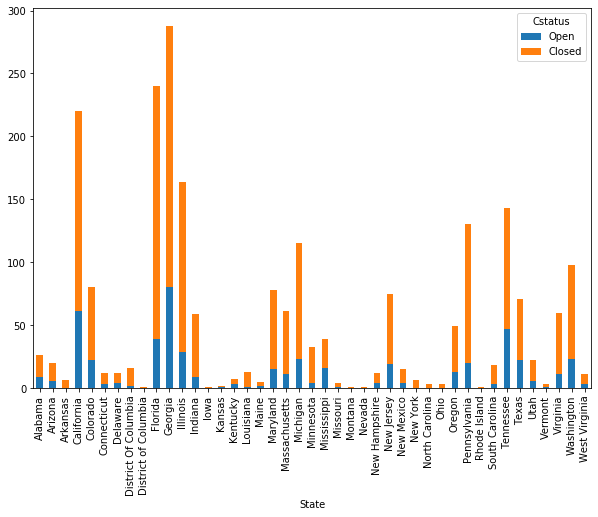

In [229]:
pivot_df.loc[:,['Open', 'Closed']].plot.bar(stacked=True,  figsize=(10,7))


# Which state has the maximum complaints


In [230]:
open=dfx[dfx['Cstatus']=='Open']
closed=dfx[dfx['Cstatus']=='Closed']

In [232]:
open=open.rename(columns={'Value':'Count of Open'})
closed=closed.rename(columns={'Value':'Count of Closed'})
total=pd.merge(open,closed,on='State')
total['total_count']=total['Count of Open']+total['Count of Closed']
toatl=total.sort_values(by='total_count',ascending=False)

In [235]:
np.max(total['total_count'])

288

In [236]:
total.head()

,State,Cstatus_x,Count of Open,Cstatus_y,Count of Closed,total_count
0,Alabama,Open,9,Closed,17,26
1,Arizona,Open,6,Closed,14,20
2,California,Open,61,Closed,159,220
3,Colorado,Open,22,Closed,58,80
4,Connecticut,Open,3,Closed,9,12


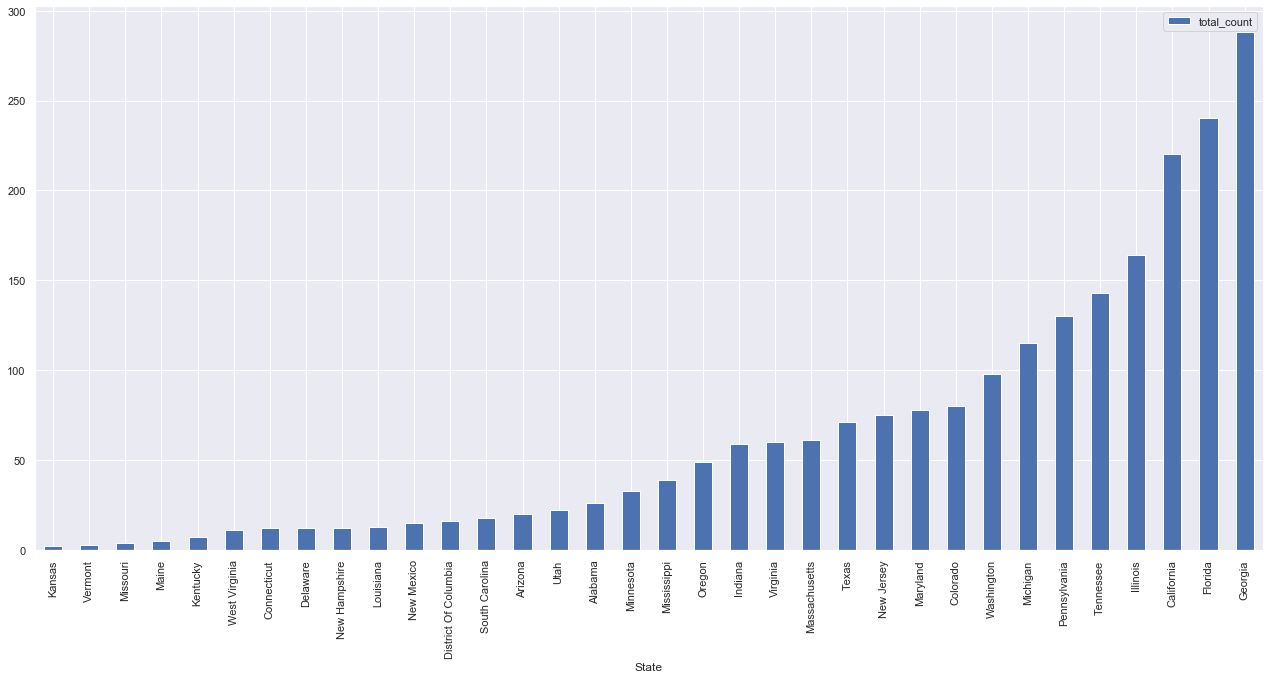

In [297]:
total=total.drop('Cstatus_x',axis=1)
total=total.drop('Cstatus_y',axis=1)
total=total.sort_values(by='total_count')
total.plot(kind='bar',x='State',y='total_count')

# Which state has the highest percentage of unresolved complaints


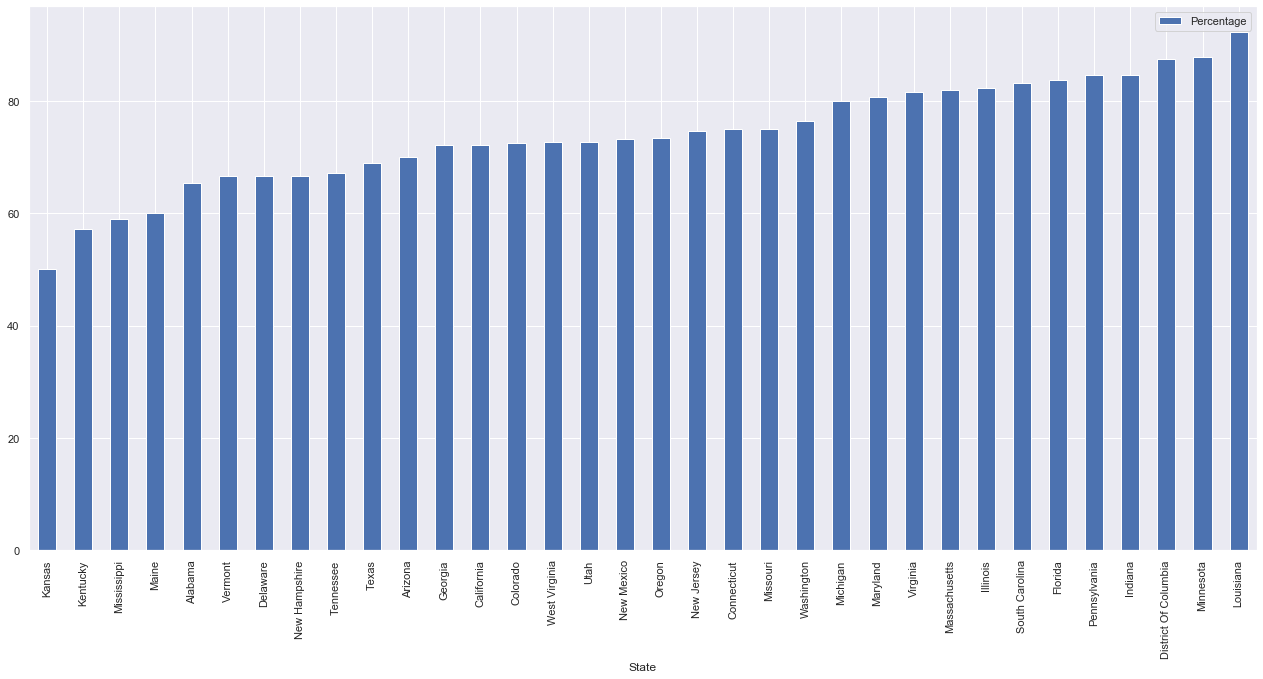

In [296]:
total['Percentage']=(total['Count of Closed']/total['total_count'])*100
total.sort_values(by='Percentage').plot(kind='bar',x='State',y='Percentage')

In [289]:
wanted_columns=wanted_columns.drop('Status',axis=1)
wanted_columns=wanted_columns.drop('Date',axis=1)
wanted_columns.head()

,Ticket Number,Received Via,State,Cstatus
0,250635,Customer Care Call,Maryland,Closed
1,223441,Internet,Georgia,Closed
2,242732,Internet,Georgia,Closed
3,277946,Internet,Georgia,Open
4,307175,Internet,Georgia,Closed


# - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.



In [248]:
ticket_unre= wanted_columns.groupby(['Received Via', 'Cstatus'])['State'].count().reset_index(name='Value')
ticket_unre

,Received Via,Cstatus,Value
0,Customer Care Call,Closed,864
1,Customer Care Call,Open,255
2,Internet,Closed,843
3,Internet,Open,262


In [249]:
ticket_unre_closed=ticket_unre[ticket_unre['Cstatus']=='Closed']
ticket_unre_open=ticket_unre[ticket_unre['Cstatus']=='Open']
Un_resolved=pd.merge(ticket_unre_closed,ticket_unre_open,on='Received Via')
Un_resolved.head()

,Received Via,Cstatus_x,Value_x,Cstatus_y,Value_y
0,Customer Care Call,Closed,864,Open,255
1,Internet,Closed,843,Open,262


In [ ]:
Un_resolved=Un_resolved.rename(columns={'Value_x':'Closed_Count','Value_y':'Open_count'})
Un_resolved=Un_resolved.drop('Cstatus_x',axis=1)
Un_resolved=Un_resolved.drop('Cstatus_y',axis=1)

In [252]:
Un_resolved.head()

,Received Via,Closed_Count,Open_count
0,Customer Care Call,864,255
1,Internet,843,262


In [253]:
Un_resolved['Total_count']=Un_resolved['Closed_Count']+Un_resolved['Open_count']

In [254]:
Un_resolved.head()

,Received Via,Closed_Count,Open_count,Total_count
0,Customer Care Call,864,255,1119
1,Internet,843,262,1105


In [255]:
Un_resolved['Percentage_unresolved']=(Un_resolved['Open_count']/Un_resolved['Total_count'])*100

In [256]:
Un_resolved.head()

,Received Via,Closed_Count,Open_count,Total_count,Percentage_unresolved
0,Customer Care Call,864,255,1119,22.788204
1,Internet,843,262,1105,23.710407


([<matplotlib.patches.Wedge at 0x1d2f6629308>,
 [Text(0.034263263924554005, 1.0994662472059962, 'Customer Care Call'),
  Text(-0.034263160985094576, -1.0994662504139496, 'Internet')],
 [Text(0.018689053049756727, 0.5997088621123614, '49.0%'),
  Text(-0.018688996900960674, -0.5997088638621543, '51.0%')])

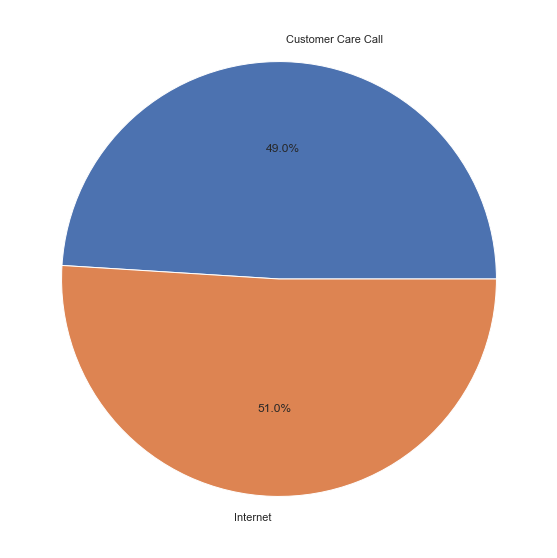

In [295]:
plt.pie(Un_resolved['Percentage_unresolved'],labels=Un_resolved['Received Via'],autopct='%1.1f%%')

In [261]:
import seaborn as sns

In [264]:
wanted_columns

,Ticket Number,Received Via,State,Cstatus
0,250635,Customer Care Call,Maryland,Closed
1,223441,Internet,Georgia,Closed
2,242732,Internet,Georgia,Closed
3,277946,Internet,Georgia,Open
4,307175,Internet,Georgia,Closed
...,...,...,...,...
2219,213550,Customer Care Call,Florida,Closed
2220,318775,Customer Care Call,Michigan,Closed
2221,331188,Internet,Michigan,Closed
2222,360489,Customer Care Call,Michigan,Closed


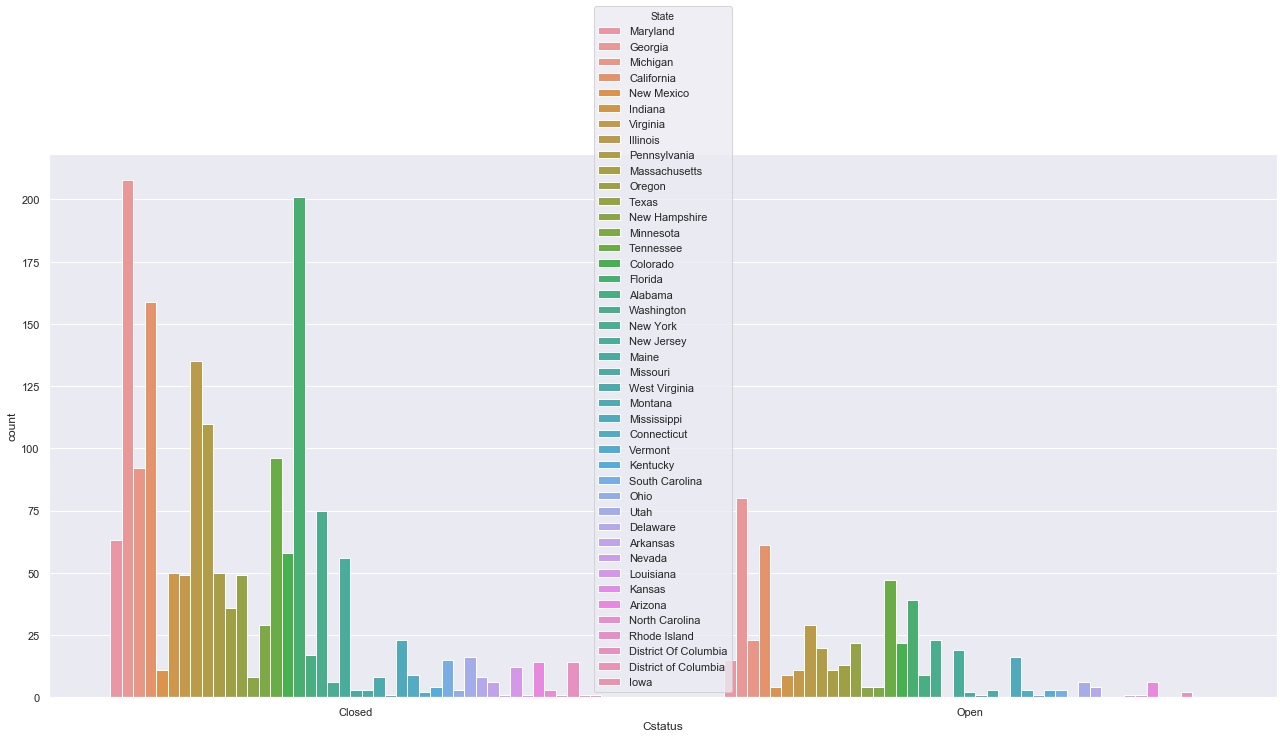

In [294]:
sns.countplot(x='Cstatus',hue="State",data=wanted_columns)

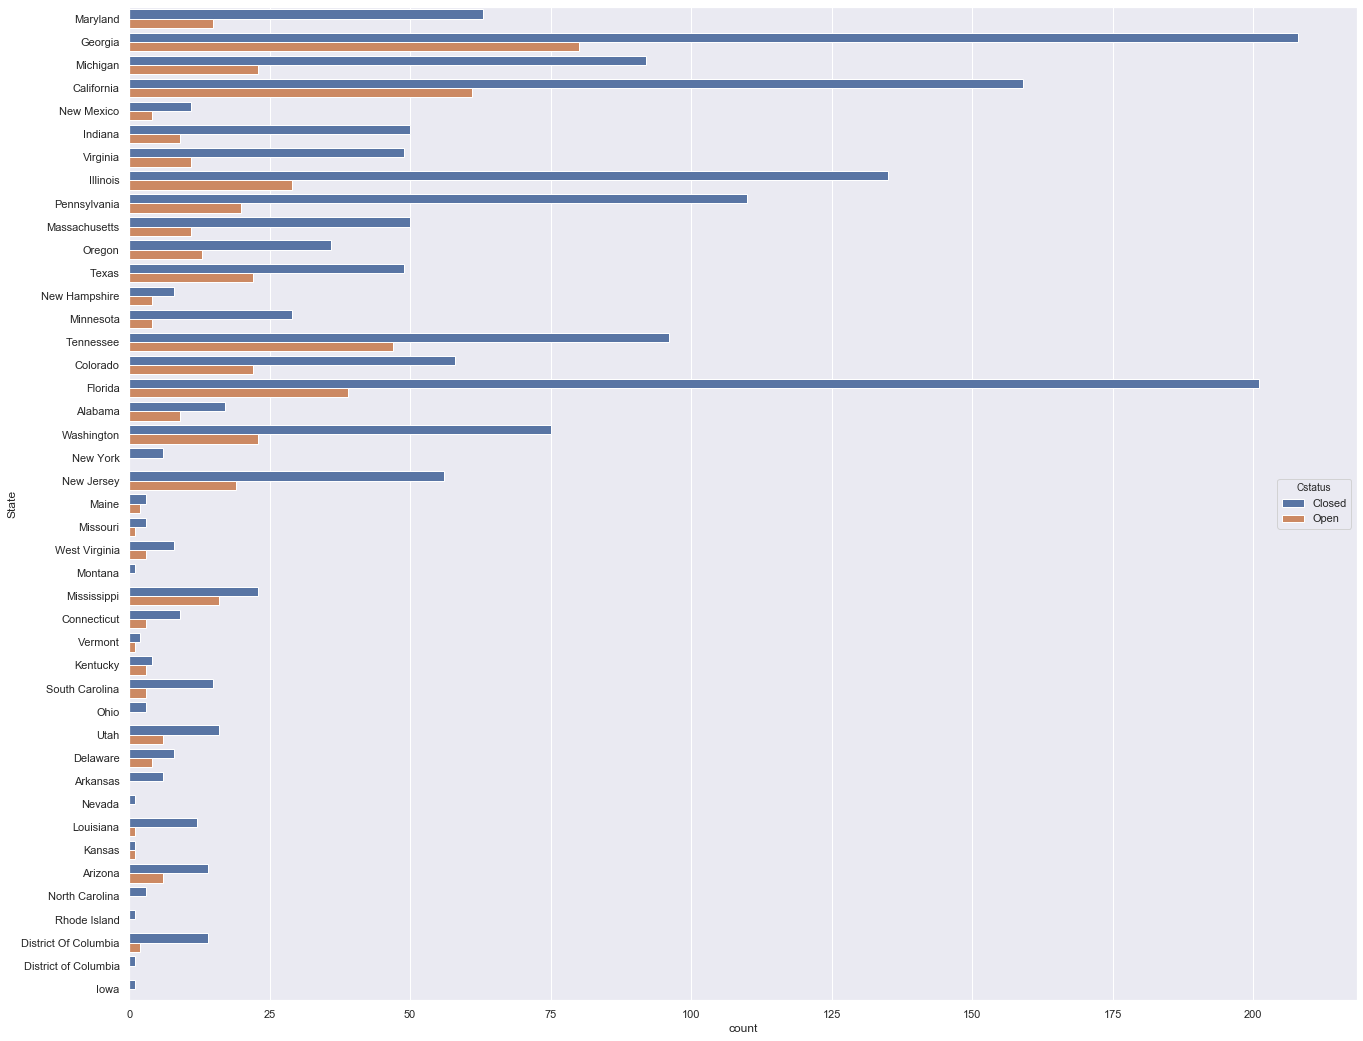

In [293]:
sns.countplot(y='State',hue="Cstatus",data=wanted_columns)
sns.set(rc={'figure.figsize':(22,10)})

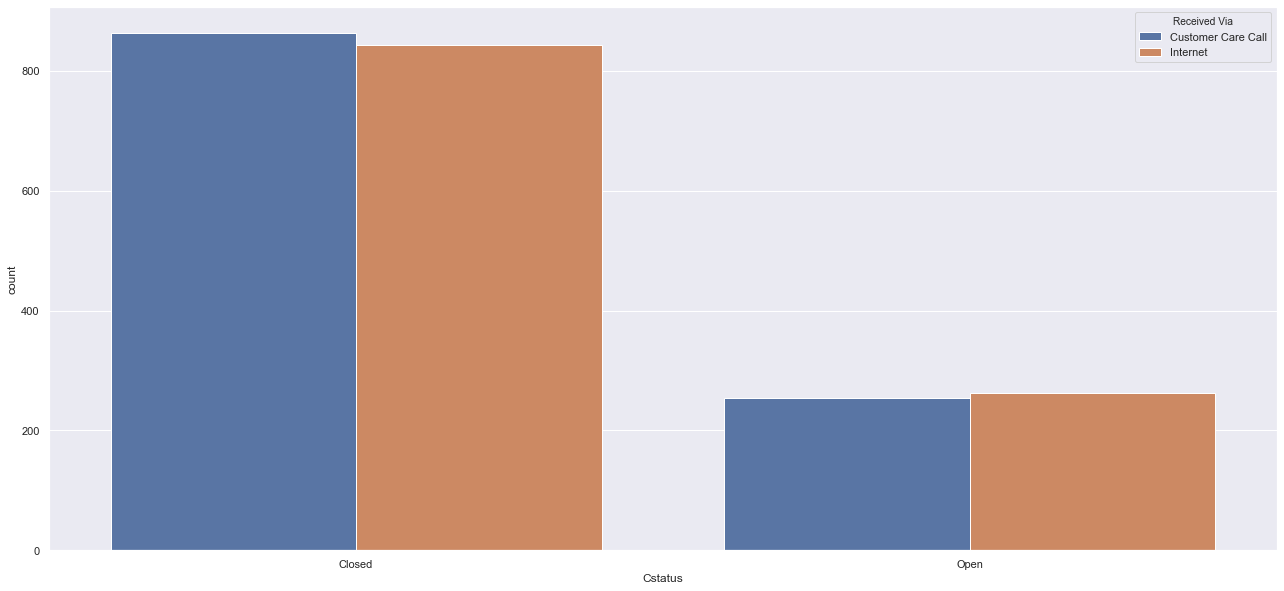

In [298]:
sns.countplot(x='Cstatus',hue="Received Via",data=wanted_columns)

In [303]:
total.sort_values(by='total_count',ascending=False)

,State,Count of Open,Count of Closed,total_count,Percentage
8,Georgia,80,208,288,72.222222
7,Florida,39,201,240,83.750000
2,California,61,159,220,72.272727
9,Illinois,29,135,164,82.317073
27,Tennessee,47,96,143,67.132867
25,Pennsylvania,20,110,130,84.615385
17,Michigan,23,92,115,80.000000
32,Washington,23,75,98,76.530612
3,Colorado,22,58,80,72.500000
15,Maryland,15,63,78,80.769231
